In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# DeepImmuno_preds = pd.read_csv("../tmp/DeepImmunoPredictions.txt",sep="\t")
# DeepImmuno_preds["pep_HLA"] = DeepImmuno_preds["peptide"] + "_" +  DeepImmuno_preds["HLA"]

In [3]:
all_data = pd.read_csv("../data/ifng_true_balanced_w_parts_w_binding_scores_w_iedb.csv")
test_data = all_data.dropna(axis=0)
labels = [min(1,x) for x in test_data["positive_subjects"]]
test_data.insert(0,"labels",labels)
test_data = test_data[test_data["parts"] == 0]

In [4]:
test_data

,labels,Unnamed: 0,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity,parts,binding_score,IEDB_predictions
22,1.0,22,GLFDFVNFV,HLA-A*02:01,0.111111,16.0,1.0,Positive,0.0,0.978181,0.27612
44,1.0,44,VLLQAGSLHA,HLA-A*02:01,0.275862,27.0,7.0,Positive,0.0,0.079892,-0.19525
46,0.0,46,RTYWIIIEL,HLA-A*02:01,0.043478,21.0,0.0,Negative,0.0,0.312956,0.64739
47,1.0,47,RIFAELEGV,HLA-A*02:01,0.181818,31.0,5.0,Positive,0.0,0.745657,0.26873
49,1.0,49,VEEDLTMTR,HLA-A*02:01,0.166667,10.0,1.0,Positive,0.0,0.000209,-0.04496
...,...,...,...,...,...,...,...,...,...,...,...
3182,1.0,3182,IGLITVLFL,HLA-A*02:01,0.125000,14.0,1.0,Positive,0.0,0.003097,0.26602
3188,0.0,3188,RFTCVLTTI,HLA-A*24:02,0.142857,5.0,0.0,Negative,0.0,0.119851,0.04355
3189,1.0,3189,KSLYNTVATL,HLA-A*02:01,0.600000,3.0,2.0,Positive,0.0,0.407683,0.11874
3208,1.0,3208,VYGIRLEHF,HLA-A*24:02,0.687500,14.0,10.0,Positive,0.0,0.972857,0.28828


0.5161430033860934


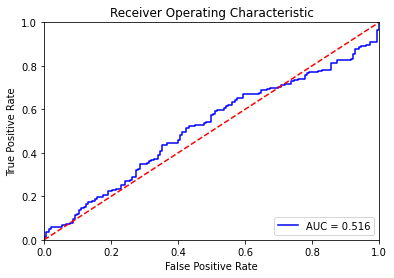

In [6]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.49034793971841245


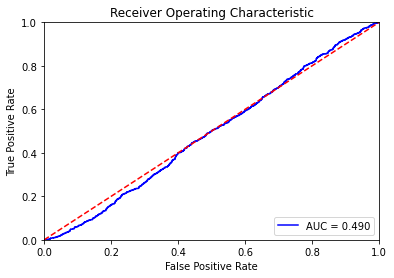

In [8]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.5161430033860934


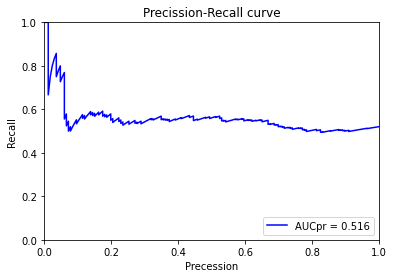

0.5553481740931874


In [7]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
PR_auc = metrics.auc(recall, precision)
plt.title('Precission-Recall curve')
plt.plot(recall, precision, 'b', label = 'AUCpr = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Recall')
plt.xlabel('Precession')
plt.show()
print(PR_auc)

## Restricting to 9-mers binding to HLA-A

In [49]:
all_data = pd.read_csv("../data/ifng_true_balanced_w_parts_w_binding_scores_w_iedb.csv")
all_data["peptide_len"] = all_data["peptide"].apply(len)
all_data = all_data[(all_data["HLA_allele"] == "HLA-A*02:01") & (all_data["peptide_len"] == 9)]
test_data = all_data.dropna(axis=0)
labels = [min(1,x) for x in test_data["positive_subjects"]]
test_data.insert(0,"labels",labels)


0.574890468485829


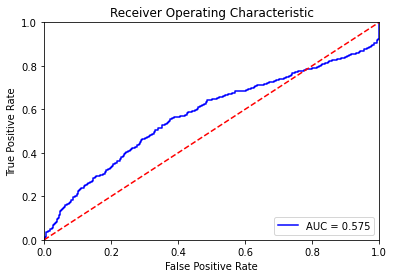

In [52]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["binding_score"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.47128926015476813


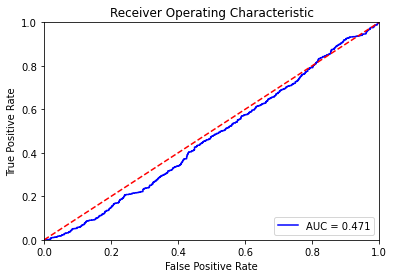

In [53]:
fpr, tpr, threshold = metrics.roc_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
precision, recall, thresholds = metrics.precision_recall_curve(test_data["labels"].astype('int'),test_data["IEDB_predictions"].astype('float'))
PR_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [55]:
test_data["peptide"].to_csv("../tmp/peptides_HLA-A*02:01.txt",index=False)